<a href="https://colab.research.google.com/github/lovepreetmultani/python/blob/main/HeartFailurePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
heart=pd.read_csv("drive/My Drive/Datasets/heart.csv")

In [5]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
duplicates = heart.duplicated()

# Print the number of duplicate rows
print("Number of duplicate rows: ", duplicates.sum())

Number of duplicate rows:  0


In [7]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: >

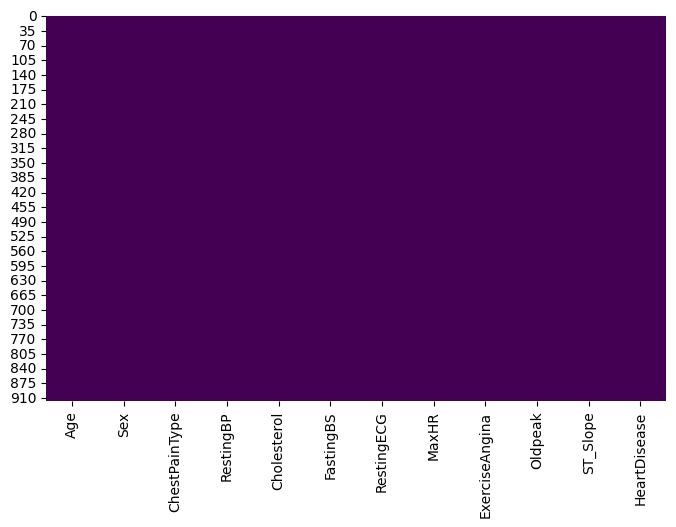

In [8]:
plt.figure(figsize=(8,5))
sns.heatmap(heart.isnull(),cbar=False,cmap='viridis')

In [9]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


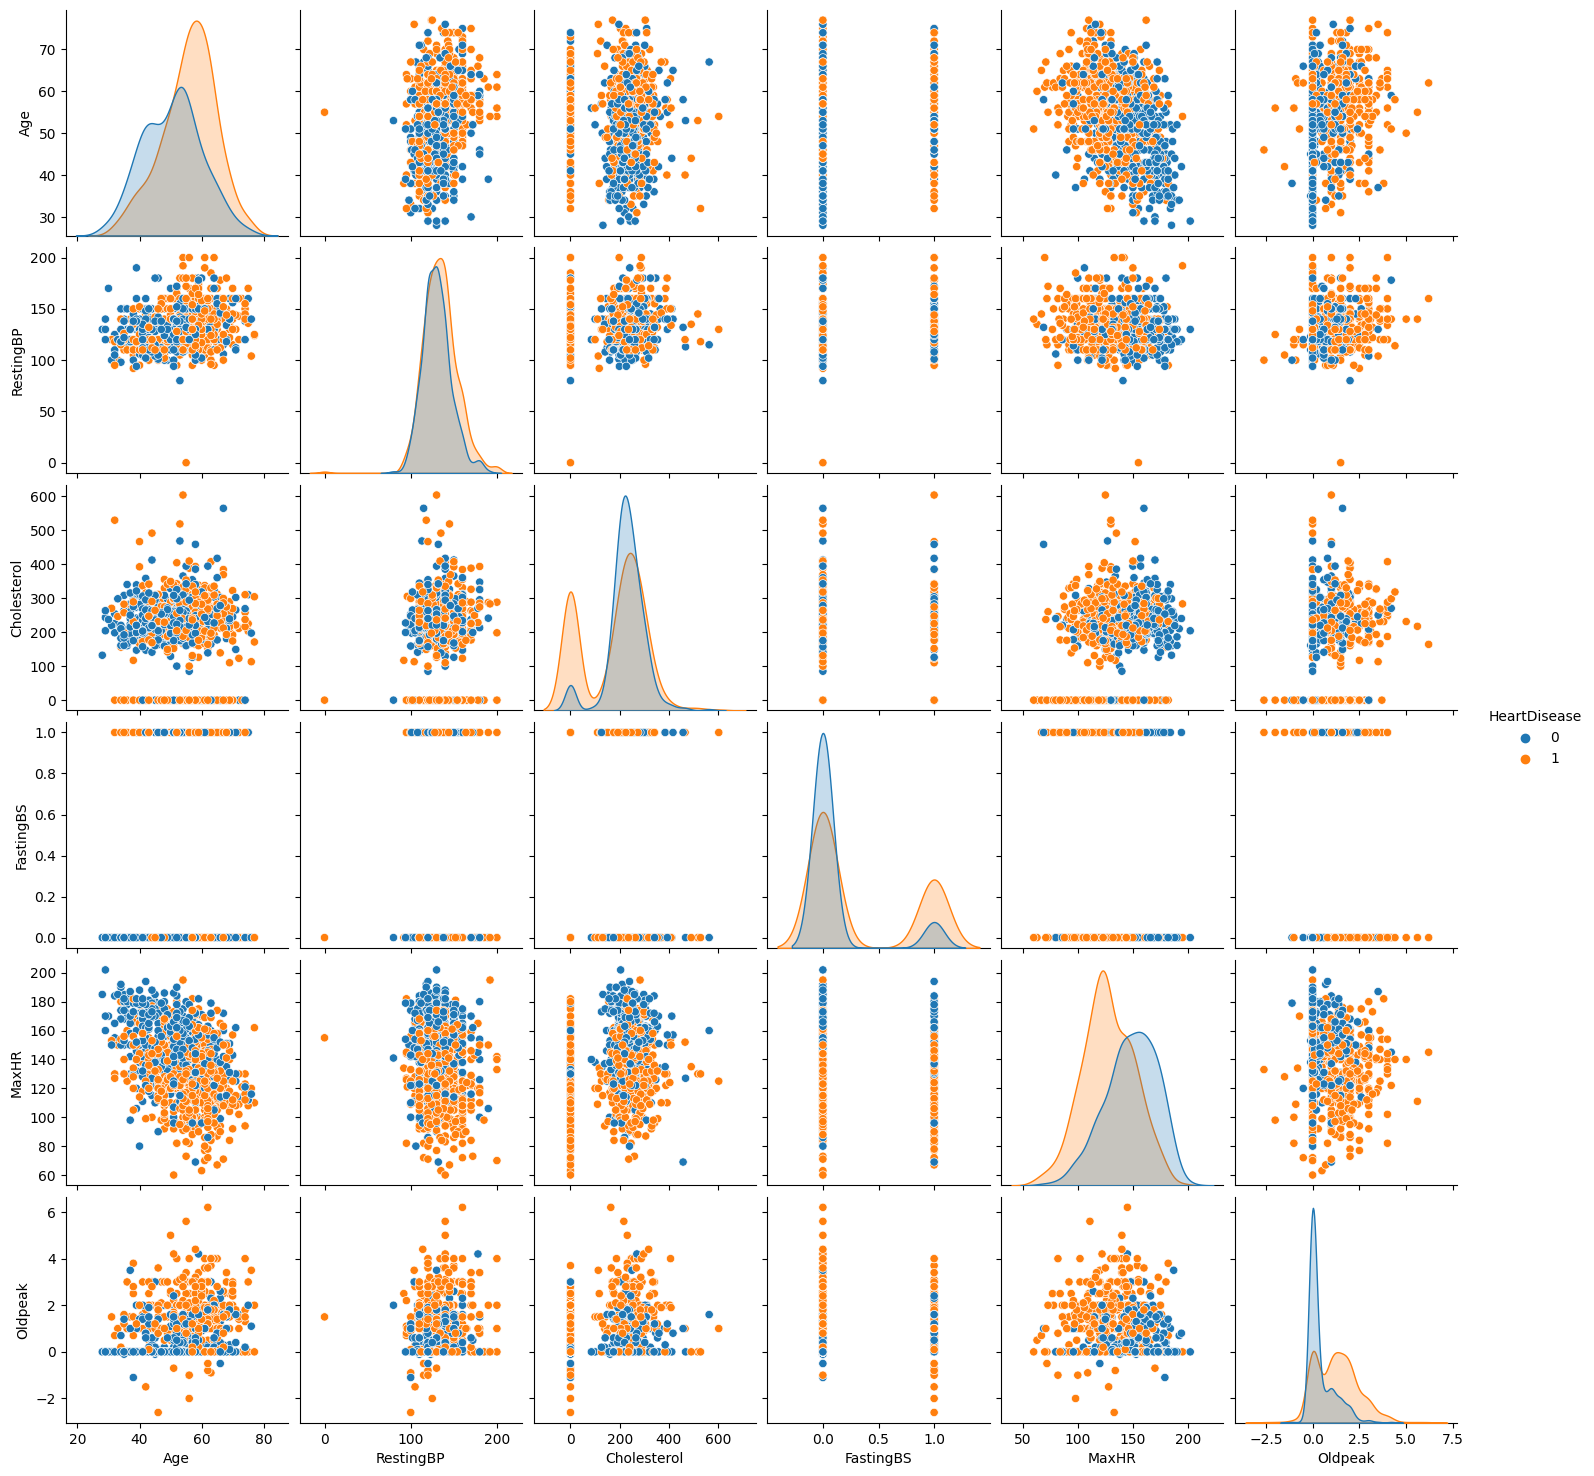

In [11]:
sns.pairplot(data=heart, hue='HeartDisease') 

ChestPainType contains 4 types which are : 
1. ATA
2. NAP
3. ASY
4. TA
----------------------------
Count for each type :::
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
----------------------------
----------------------------


Text(0.5, 1.0, 'Counts of Each class of ChestPainType')

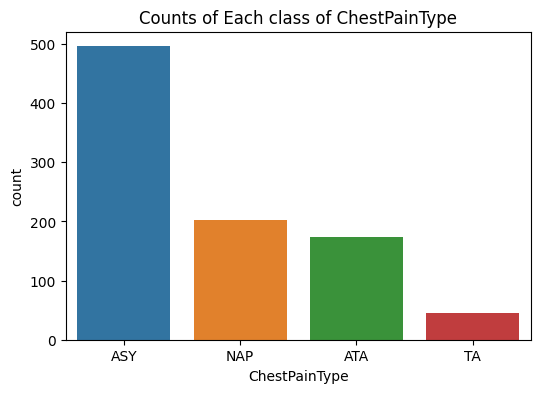

In [12]:
print("ChestPainType contains 4 types which are : ")
i=1
for x in heart['ChestPainType'].unique():
  print("{}. {}".format(i,x))
  i = i + 1
print("----------------------------")
print("Count for each type :::")
print(heart['ChestPainType'].value_counts())
print("----------------------------")
print("----------------------------")
plt.figure(figsize = (6,4))
sns.countplot(x=heart['ChestPainType'], order= ['ASY','NAP','ATA','TA'])
plt.title("Counts of Each class of ChestPainType")

ST_Slope contains 3 types which are : 
1. Up
2. Flat
3. Down
----------------------------
Count for each type :::
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
----------------------------
----------------------------


Text(0.5, 1.0, 'Counts of Each class of ST_Slope')

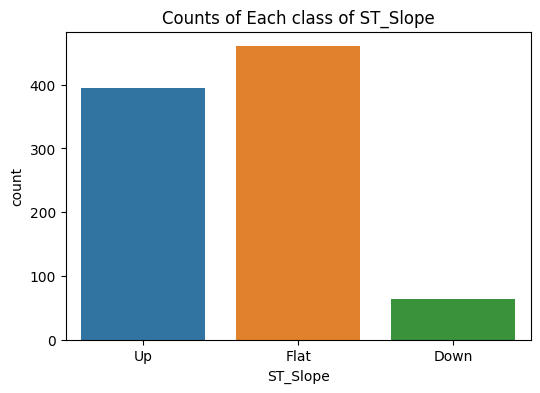

In [13]:
print("ST_Slope contains 3 types which are : ")
i=1
for x in heart['ST_Slope'].unique():
  print("{}. {}".format(i,x))
  i = i + 1
print("----------------------------")
print("Count for each type :::")
print(heart['ST_Slope'].value_counts())
print("----------------------------")
print("----------------------------")
plt.figure(figsize = (6,4))
sns.countplot(x=heart['ST_Slope'])
plt.title("Counts of Each class of ST_Slope")

RestingECG contains 3 types which are : 
1. Normal
2. ST
3. LVH
----------------------------
Count for each type :::
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
----------------------------
----------------------------


Text(0.5, 1.0, 'Counts of Each class of RestingECG')

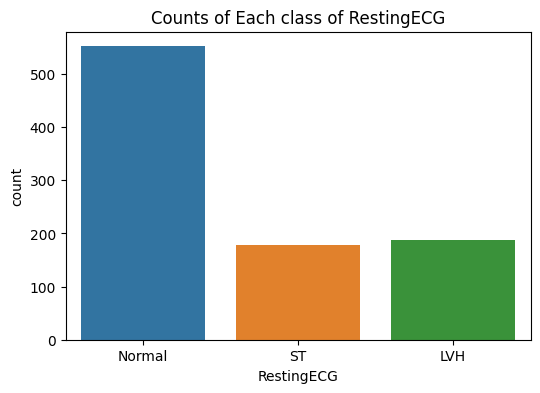

In [14]:
print("RestingECG contains 3 types which are : ")
i=1
for x in heart['RestingECG'].unique():
  print("{}. {}".format(i,x))
  i = i + 1
print("----------------------------")
print("Count for each type :::")
print(heart['RestingECG'].value_counts())
print("----------------------------")
print("----------------------------")
plt.figure(figsize = (6,4))
sns.countplot(x=heart['RestingECG'])
plt.title("Counts of Each class of RestingECG")

In [15]:
binary_variables = ['Sex','FastingBS','ExerciseAngina','HeartDisease'] 

for variable in binary_variables:
  print("Count for each type of {} :::".format(variable))
  print(heart[variable].value_counts())
  print("----------------------------")

Count for each type of Sex :::
M    725
F    193
Name: Sex, dtype: int64
----------------------------
Count for each type of FastingBS :::
0    704
1    214
Name: FastingBS, dtype: int64
----------------------------
Count for each type of ExerciseAngina :::
N    547
Y    371
Name: ExerciseAngina, dtype: int64
----------------------------
Count for each type of HeartDisease :::
1    508
0    410
Name: HeartDisease, dtype: int64
----------------------------


# ***Exploratory Data Analysis***

<ipython-input-16-9d9fc6ed2526>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Figure size 800x550 with 0 Axes>

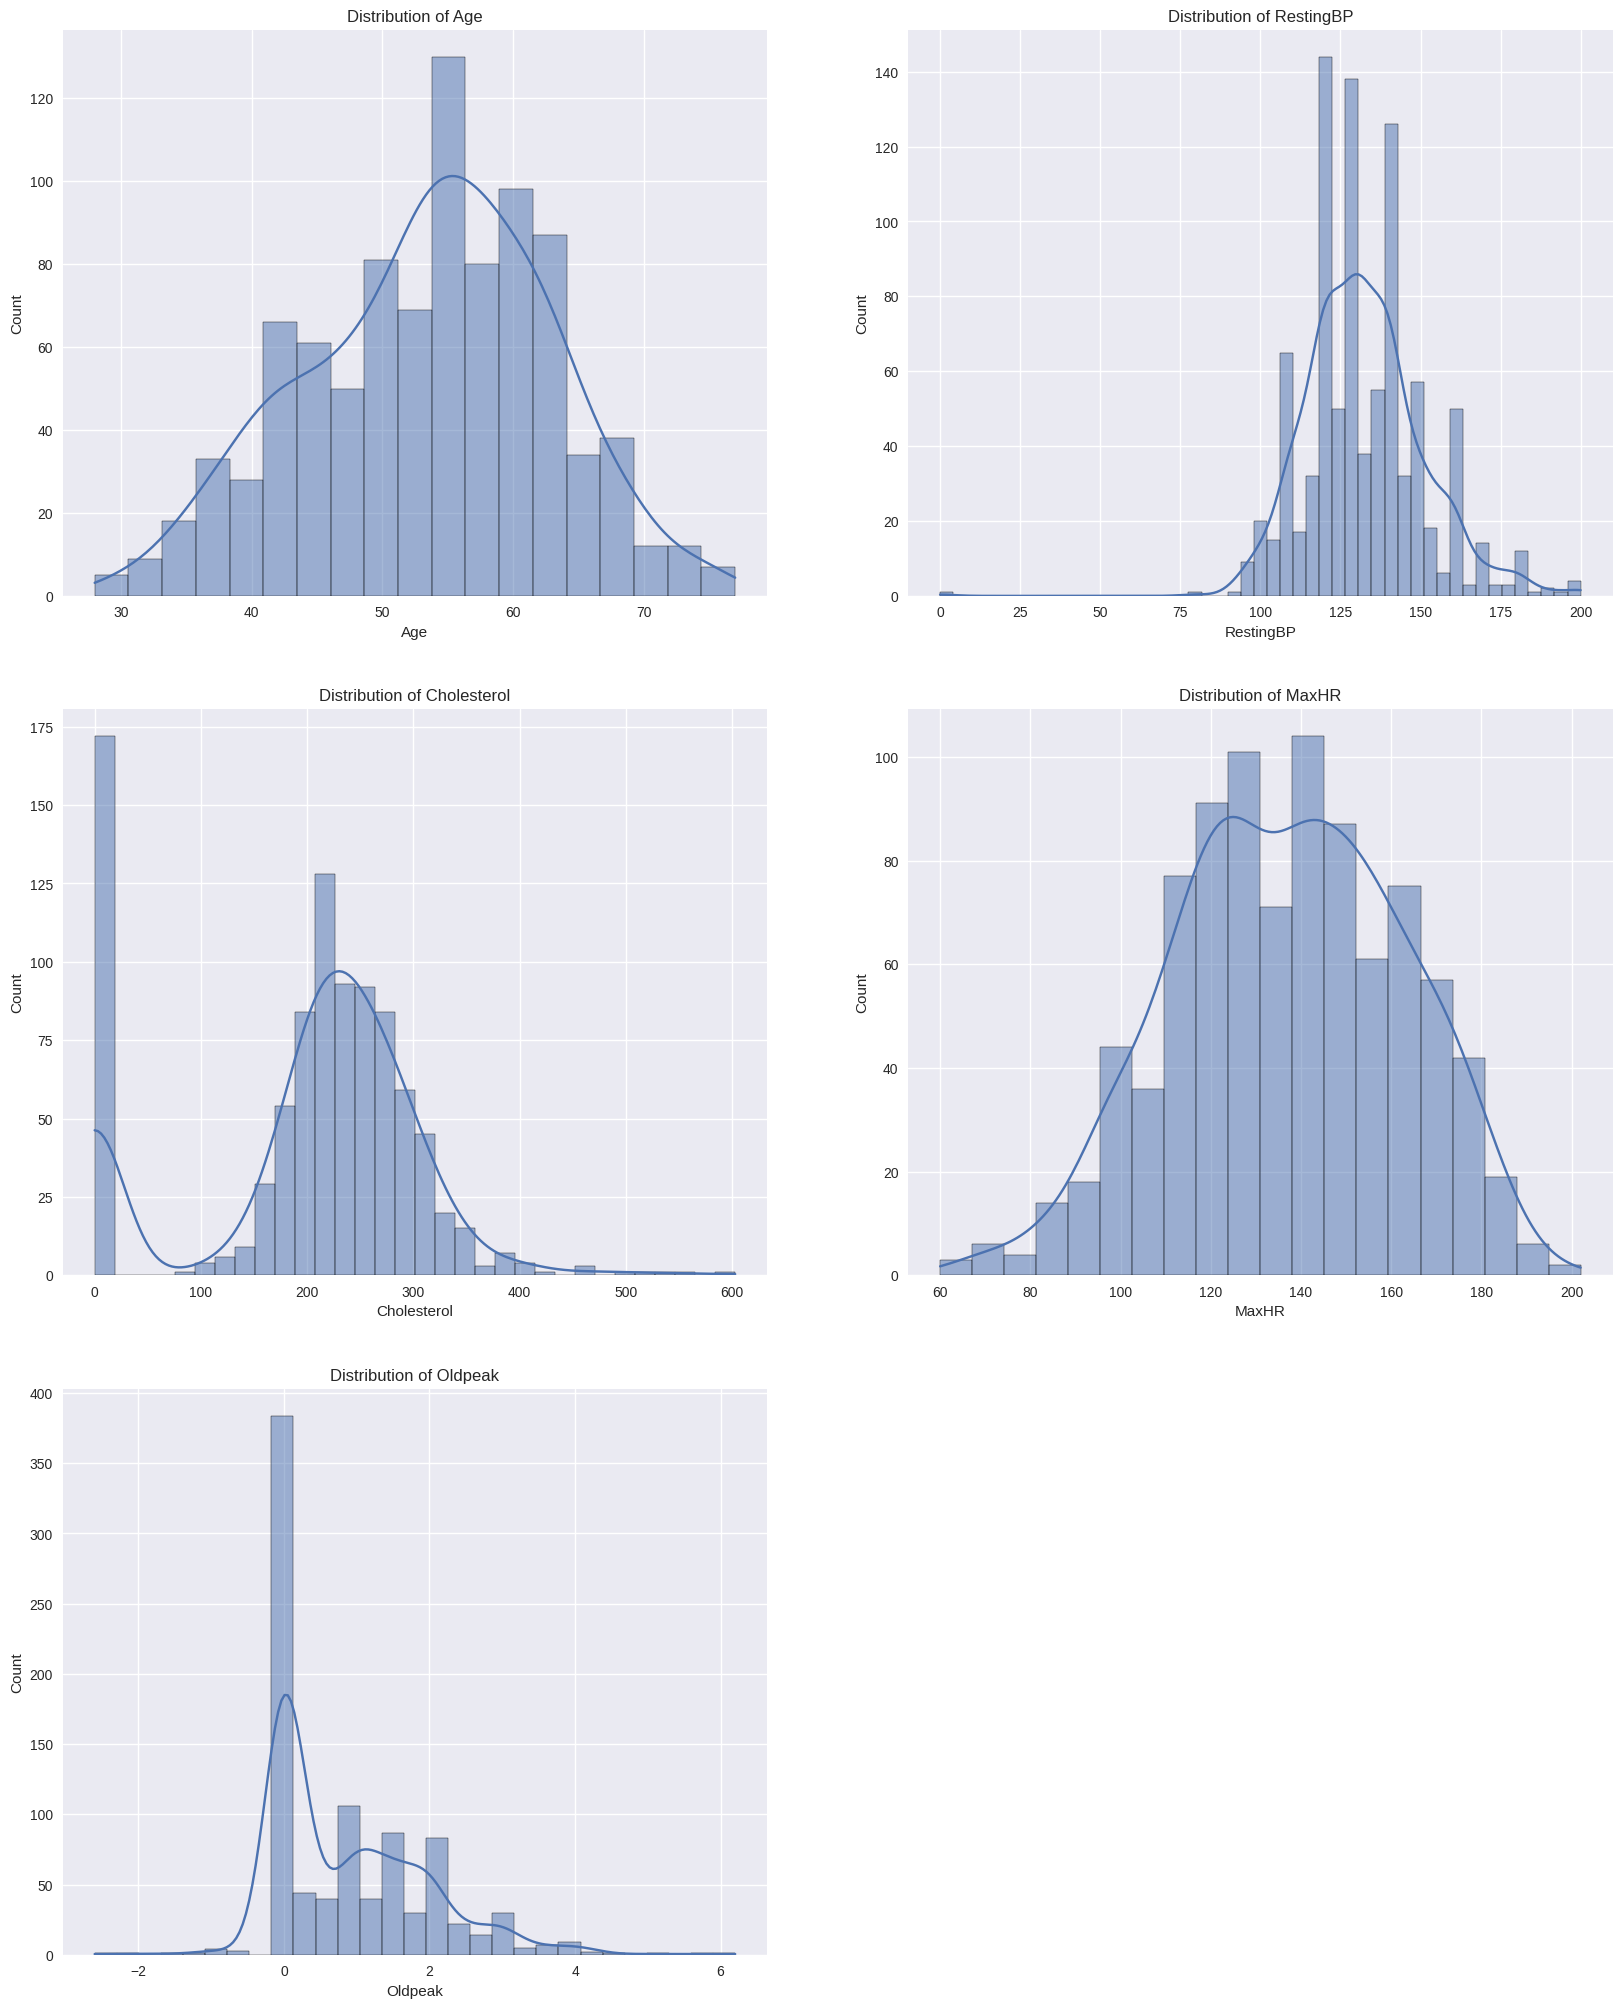

In [16]:
numerical_variables = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
plt.style.use("seaborn")
plt.subplots_adjust(top=0.9,hspace=6,wspace = 1)
plt.figure(figsize=(20,25))
plt.subplot(3,2,1)
i=1
for feature in heart.columns:
    if feature  in numerical_variables :
        plt.subplot(3,2,i)
        sns.histplot(data=heart, x=feature, kde=True)
        plt.title("Distribution of {}".format(feature))
        i+=1

Text(0.5, 1.0, 'Distribution of HeartDisease')

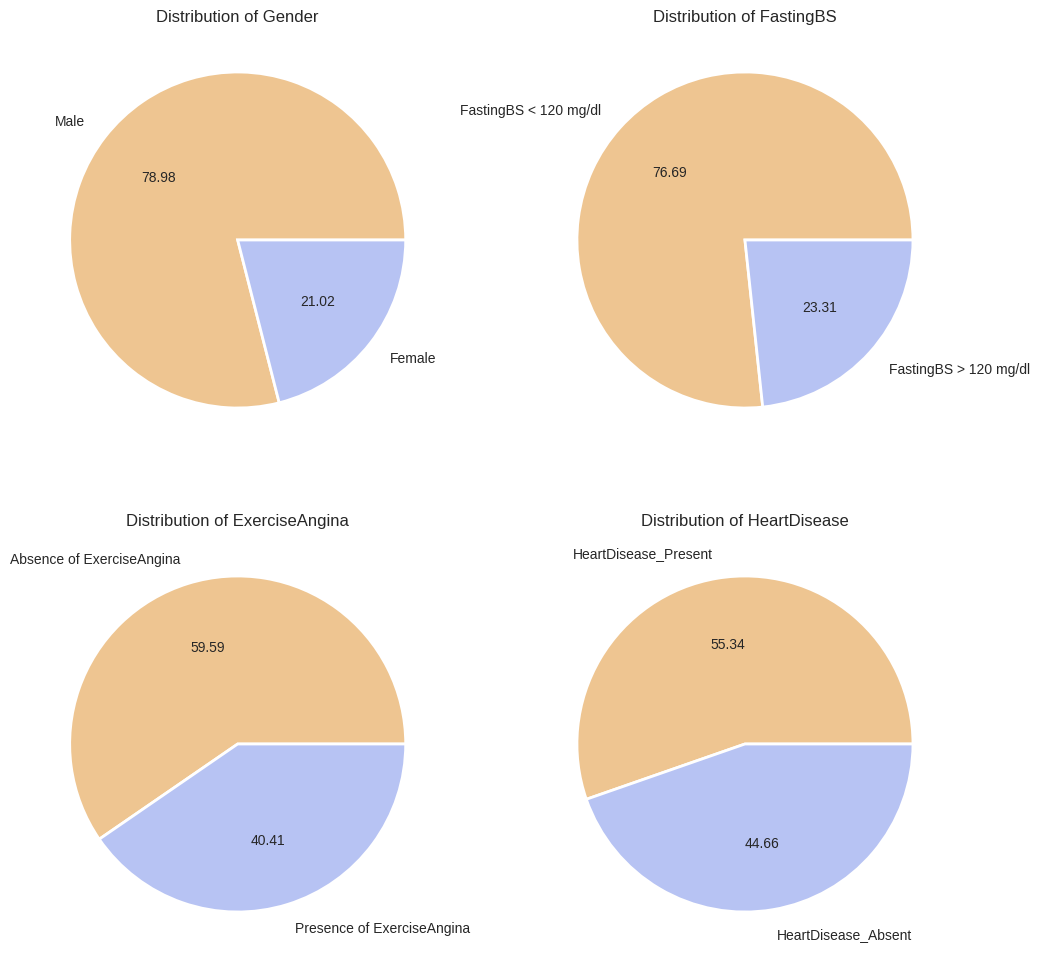

In [17]:
binary_variables = ['Sex','FastingBS','ExerciseAngina','HeartDisease'] 
colors = ['#EEC591', '#B7C3F3']
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
values = heart['Sex'].value_counts()
labels = ['Male','Female']
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },colors = colors, autopct= '%.2f');
plt.title("Distribution of Gender")
plt.subplot(2,2,2)
values = heart['FastingBS'].value_counts()
labels = ['FastingBS < 120 mg/dl','FastingBS > 120 mg/dl']
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },colors = colors, autopct= '%.2f');
plt.title("Distribution of FastingBS")
plt.subplot(2,2,3)
values = heart['ExerciseAngina'].value_counts()
labels = ['Absence of ExerciseAngina','Presence of ExerciseAngina']
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },colors = colors,autopct= '%.2f');
plt.title("Distribution of ExerciseAngina")
plt.subplot(2,2,4)
values = heart['HeartDisease'].value_counts() #'#4F6272', '#B7C3F3' 
labels = ['HeartDisease_Present','HeartDisease_Absent']
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },colors = colors,autopct= '%.2f');
plt.title("Distribution of HeartDisease")

Text(0.5, 1.0, 'Counts of Chest pain types')

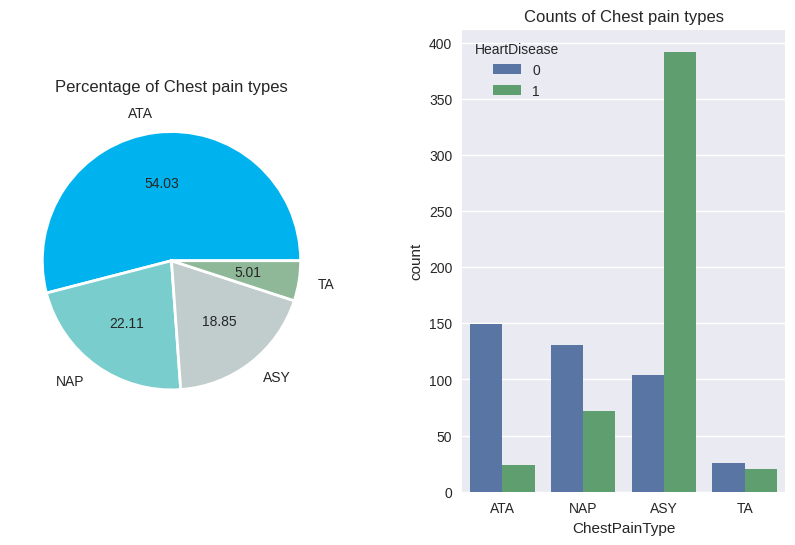

In [18]:
values = heart['ChestPainType'].value_counts()
labels = heart['ChestPainType'].unique()
colors = ['#00B2EE', '#79CDCD', '#C1CDCD', '#8EB897']
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.4)
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, colors=colors,autopct= '%.2f');
plt.title("Percentage of Chest pain types")
plt.subplot(1,2,2)
sns.countplot(x=heart['ChestPainType'], hue=heart['HeartDisease'])
plt.title("Counts of Chest pain types")

Text(0.5, 1.0, 'Counts of ST_Slope')

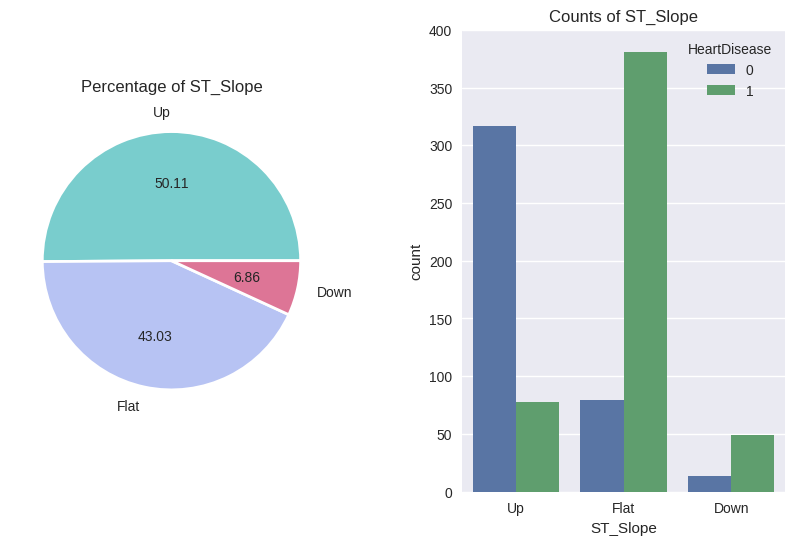

In [19]:
values = heart['ST_Slope'].value_counts()
labels = heart['ST_Slope'].unique()
colors = ['#79CDCD', '#B7C3F3', '#DD7596', '#8EB897']
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.4)
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, colors=colors,autopct= '%.2f');
plt.title("Percentage of ST_Slope")
plt.subplot(1,2,2)
sns.countplot(x=heart['ST_Slope'], hue=heart['HeartDisease'])
plt.title("Counts of ST_Slope")

Text(0.5, 1.0, 'Counts of RestingECG classes')

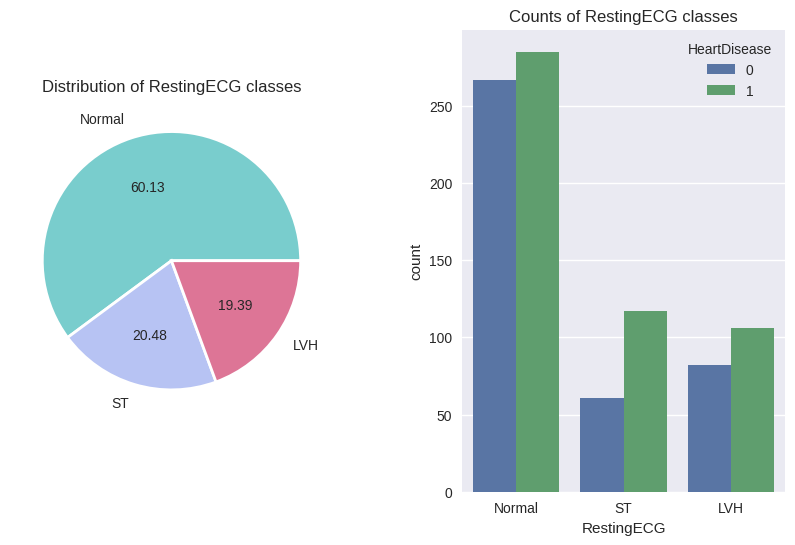

In [20]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.4)
values = heart['RestingECG'].value_counts()
labels = heart['RestingECG'].unique()
colors = ['#79CDCD', '#B7C3F3', '#DD7596', '#8EB897']
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, colors=colors,autopct= '%.2f');
plt.title("Distribution of RestingECG classes")
plt.subplot(1,2,2)
sns.countplot(x=heart['RestingECG'], hue=heart['HeartDisease'])
plt.title("Counts of RestingECG classes")

<ipython-input-21-fd8dd52144ec>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Figure size 800x550 with 0 Axes>

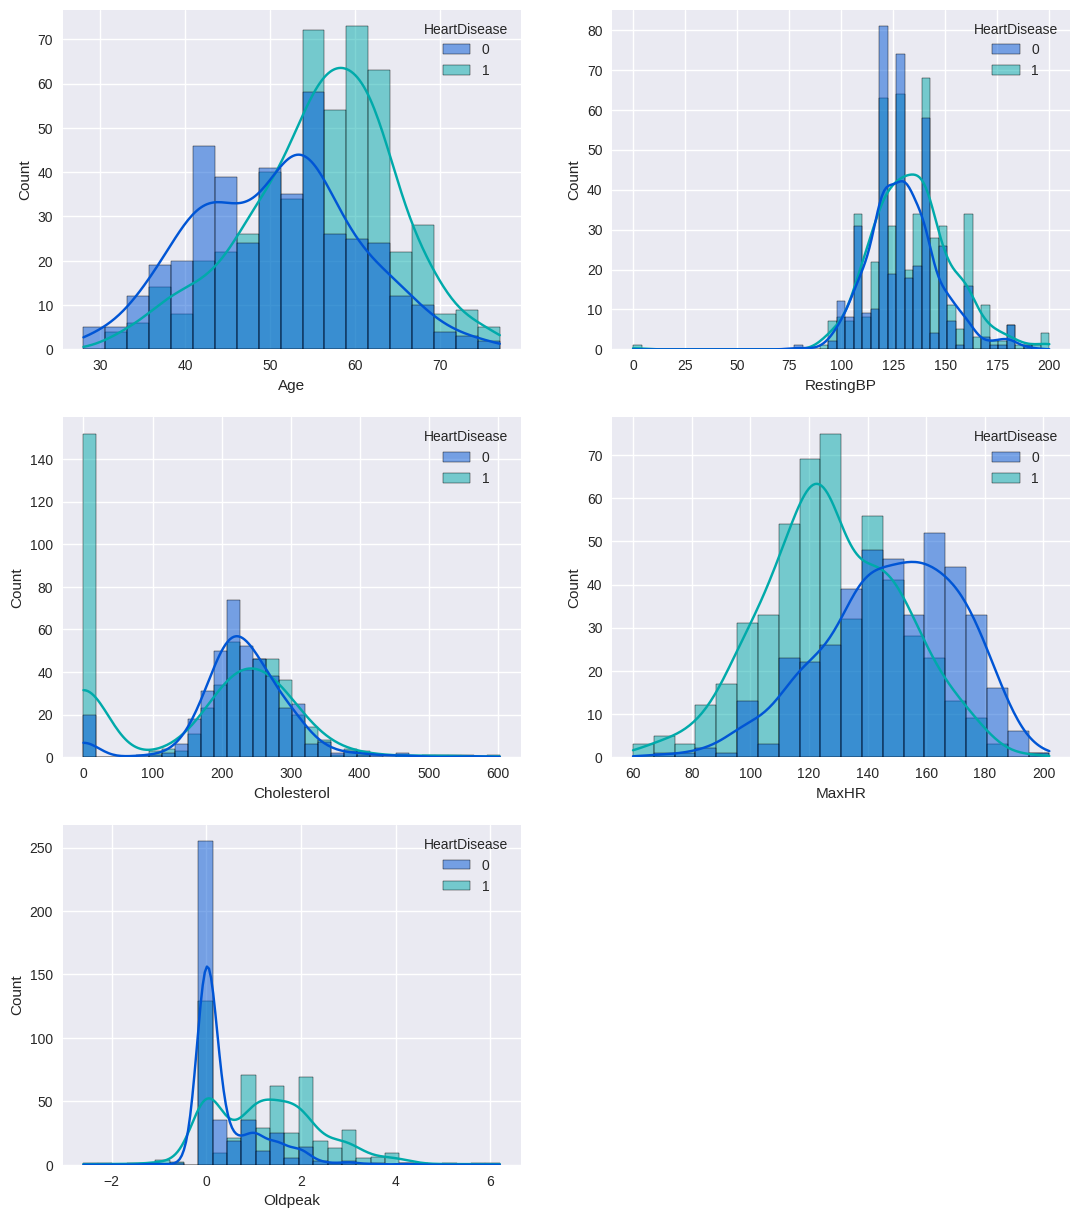

In [21]:
numerical_variables = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
plt.style.use("seaborn")
plt.subplots_adjust(hspace=0.2,wspace = 0.4)
plt.figure(figsize=(13,15))
plt.subplot(3,2,1)
i=1
for feature in heart.columns:
    if feature  in numerical_variables :
        plt.subplot(3,2,i)
        sns.histplot(data=heart, x=feature, kde=True, palette="winter", hue='HeartDisease')
        i+=1

<Axes: xlabel='HeartDisease', ylabel='Sex'>

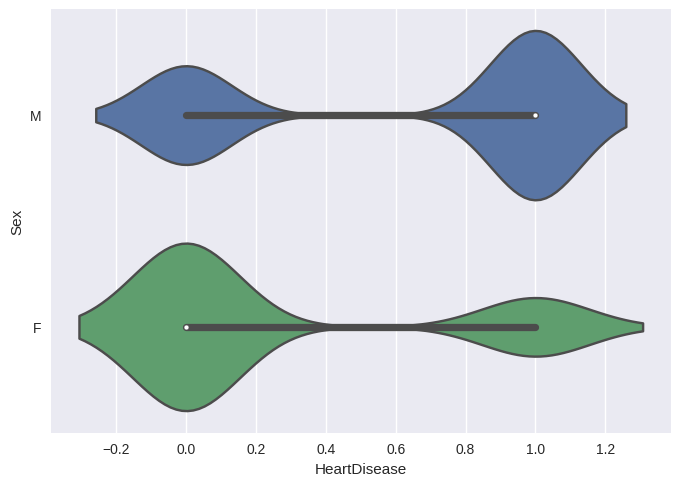

In [22]:
sns.violinplot(x = heart['HeartDisease'] , y = heart['Sex']) # which specific gender is most likely to have heart Disease

Text(0.5, 1.0, 'Age vs Cholesterol')

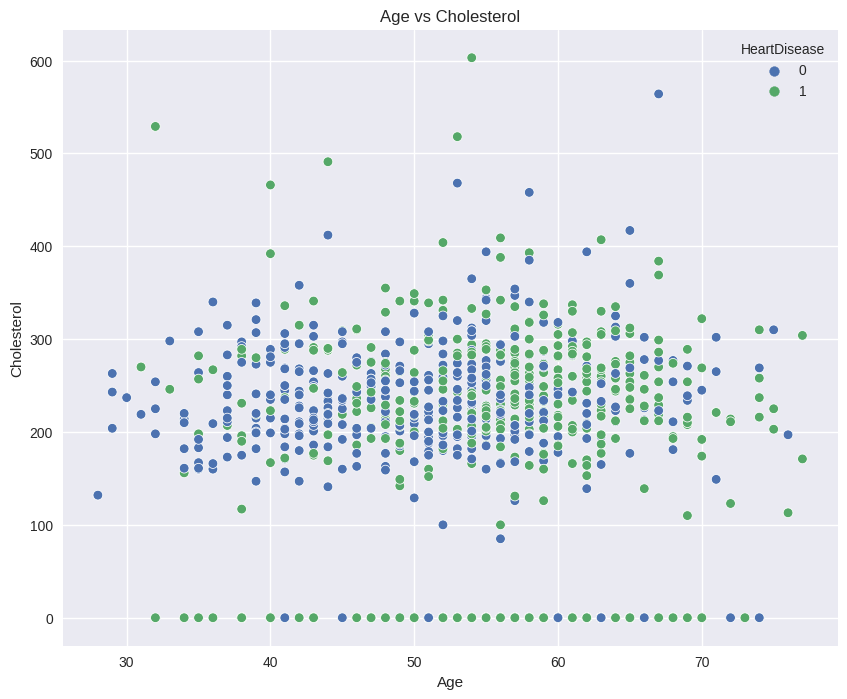

In [23]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=heart["Age"], y=heart["Cholesterol"],hue = heart['HeartDisease']).set_title("Age vs Cholesterol")

Text(0.5, 1.0, 'Age vs MaxHR')

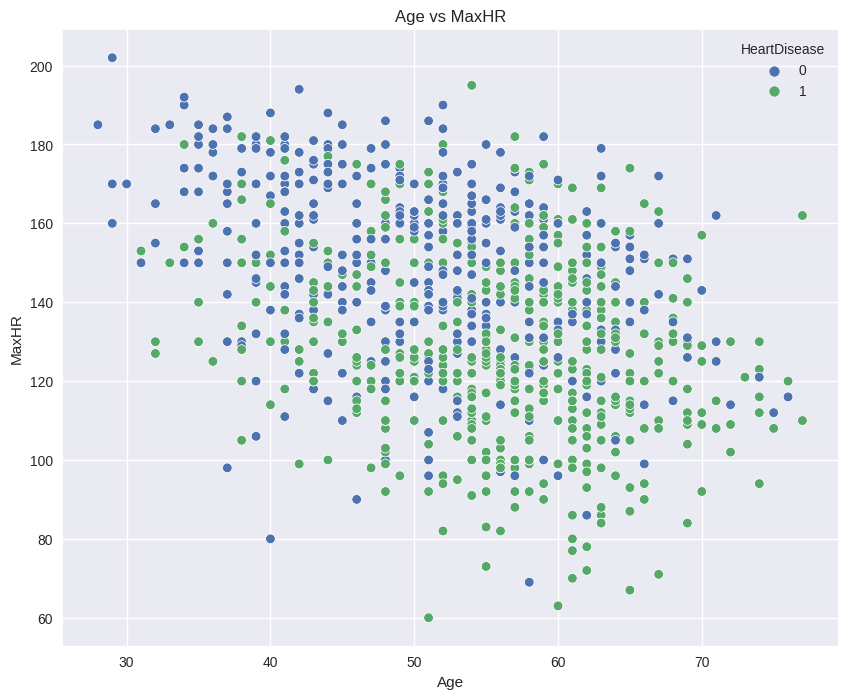

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=heart["Age"], y=heart["MaxHR"],hue = heart['HeartDisease']).set_title("Age vs MaxHR")

Text(0.5, 1.0, 'Age vs RestingBP')

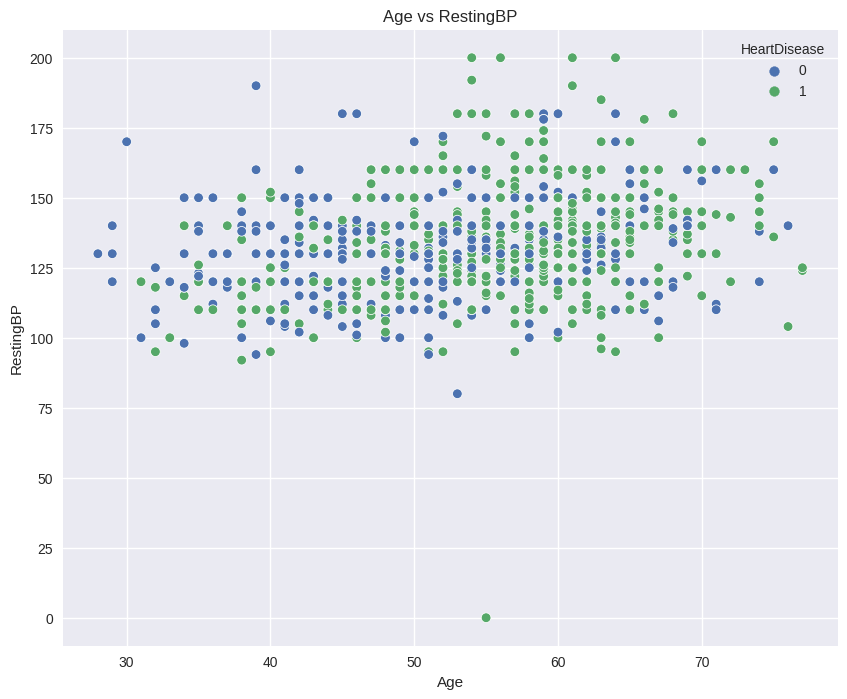

In [25]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=heart["Age"], y=heart["RestingBP"],hue = heart['HeartDisease']).set_title("Age vs RestingBP")

Text(0.5, 1.0, 'Age vs Oldpeak')

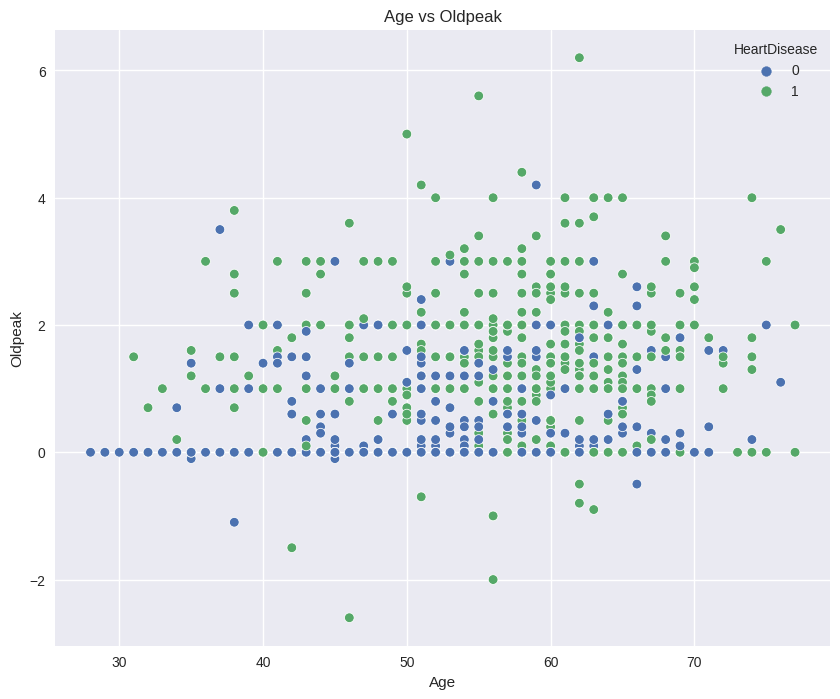

In [26]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=heart["Age"], y=heart["Oldpeak"],hue = heart['HeartDisease']).set_title("Age vs Oldpeak")

#Detecting and Outliers

<ipython-input-27-2deb27e14e85>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Figure size 800x550 with 0 Axes>

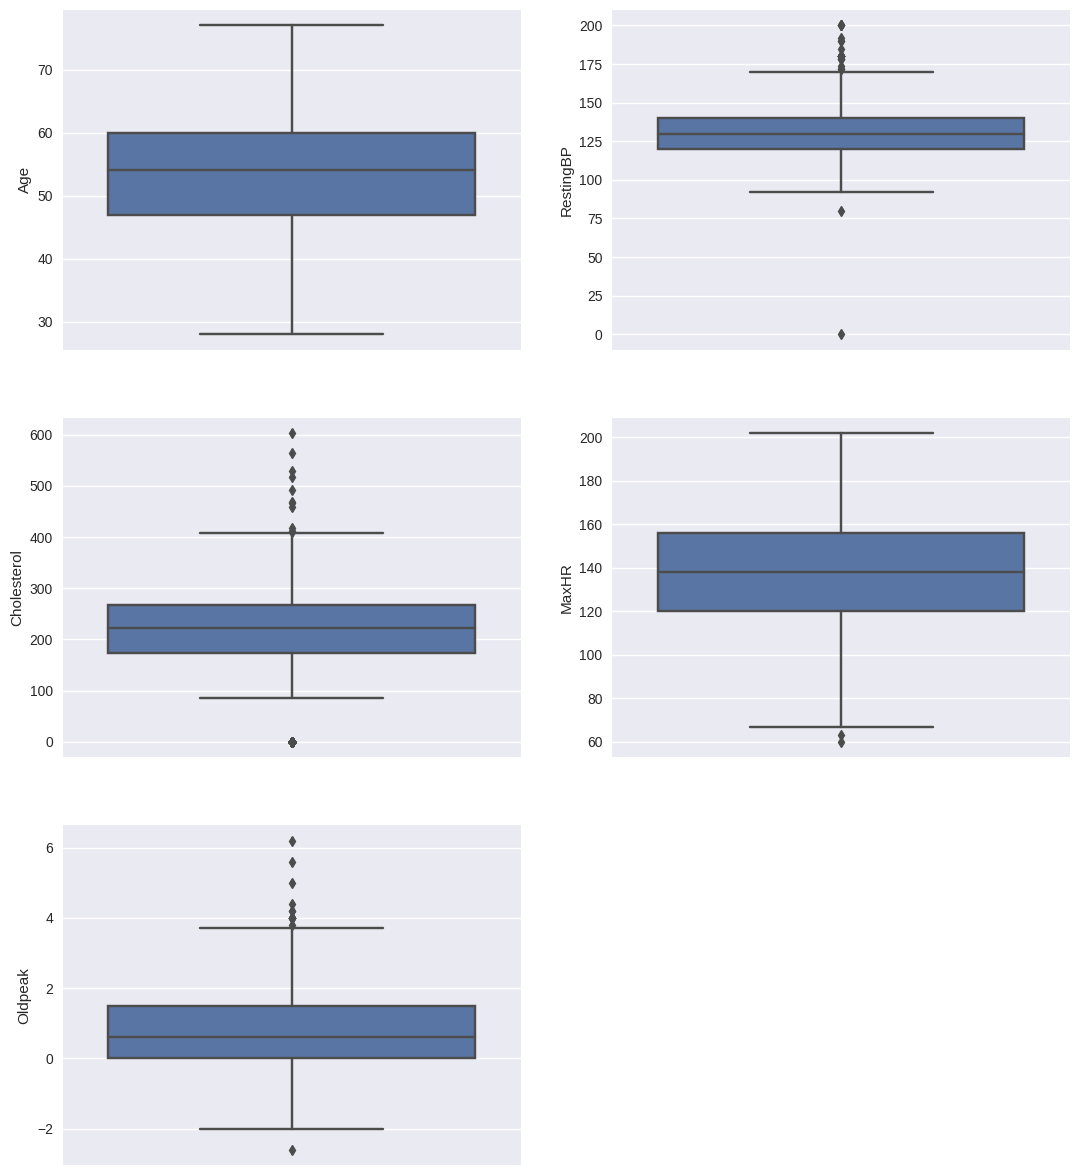

In [27]:
plt.style.use("seaborn")
plt.subplots_adjust(hspace=0.6,wspace = 0.4)
plt.figure(figsize=(13,15))
plt.subplot(3,2,1)
i=1
for feature in heart.columns:
    if feature  in numerical_variables :
        plt.subplot(3,2,i)
        sns.boxplot(y=heart[feature])
        i+=1

In [28]:
temp = heart.copy()

In [29]:
for variable in numerical_variables:
  stat, p = stats.shapiro(temp[variable])

  alpha = 0.05
  if p > alpha:
      print('"{}" looks normally distributed (fail to reject H0)'.format(variable))
  else:
      print('"{}" does not look normally distributed (reject H0)'.format(variable))
  print(" ")

"Age" does not look normally distributed (reject H0)
 
"RestingBP" does not look normally distributed (reject H0)
 
"Cholesterol" does not look normally distributed (reject H0)
 
"MaxHR" does not look normally distributed (reject H0)
 
"Oldpeak" does not look normally distributed (reject H0)
 


In [30]:
# Calculate the IQR of the data
Q1 = temp['Cholesterol'].quantile(0.25)
Q3 = temp['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper and lower bounds for outliers
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# Identify the outliers in the dataframe
outliers = temp[(temp['Cholesterol'] < lower_bound) | (temp['Cholesterol'] > upper_bound)].dropna()

# Delete the outliers from the dataframe
temp= temp.drop(outliers.index)

In [31]:
Q1 = temp['Oldpeak'].quantile(0.25)
Q3 = temp['Oldpeak'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

outliers = temp[(temp['Oldpeak'] < lower_bound) | (temp['Oldpeak'] > upper_bound)].dropna()

temp= temp.drop(outliers.index)

In [32]:
Q1 = temp['RestingBP'].quantile(0.25)
Q3 = temp['RestingBP'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

outliers = temp[(temp['RestingBP'] < lower_bound) | (temp['RestingBP'] > upper_bound)].dropna()

temp= temp.drop(outliers.index)

In [33]:
Q1 = temp['MaxHR'].quantile(0.25)
Q3 = temp['MaxHR'].quantile(0.75)
IQR = Q3 - Q1


upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

outliers = temp[(temp['MaxHR'] < lower_bound) | (temp['MaxHR'] > upper_bound)].dropna()

temp= temp.drop(outliers.index)

In [34]:
Q1 = temp['Age'].quantile(0.25)
Q3 = temp['Age'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

outliers = temp[(temp['Age'] < lower_bound) | (temp['Age'] > upper_bound)].dropna()

outliers.shape 

(0, 12)

**After Removing Outliers**

<ipython-input-35-708fa0126542>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Figure size 800x550 with 0 Axes>

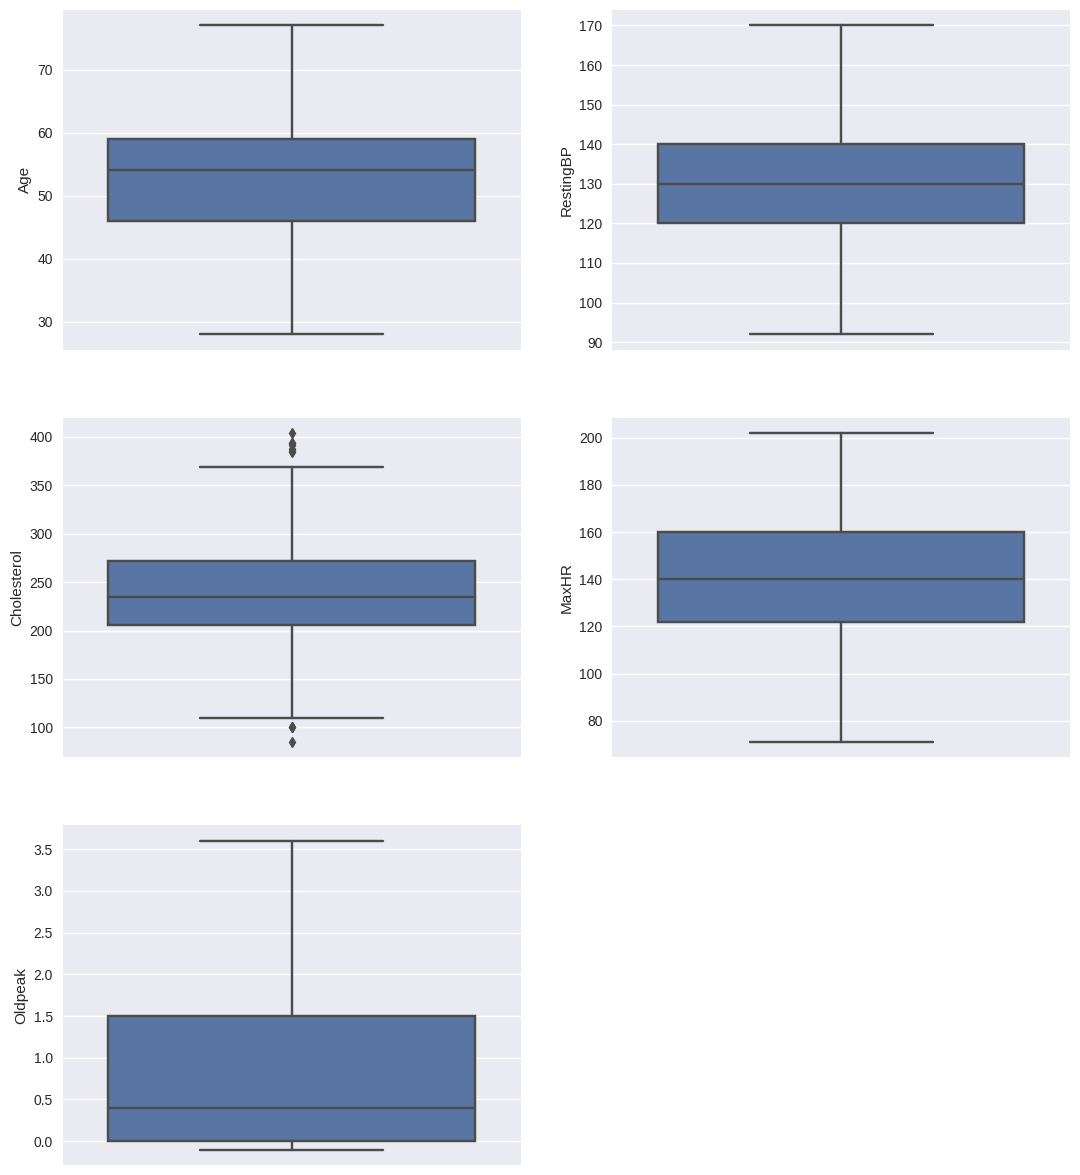

In [35]:
plt.style.use("seaborn")
plt.subplots_adjust(hspace=0.6,wspace = 0.4)
plt.figure(figsize=(13,15))
plt.subplot(3,2,1)
i=1
for feature in temp.columns:
    if feature  in numerical_variables :
        plt.subplot(3,2,i)
        sns.boxplot(y=temp[feature])
        i+=1

In [36]:
temp.shape

(702, 12)

<Figure size 2000x4000 with 0 Axes>

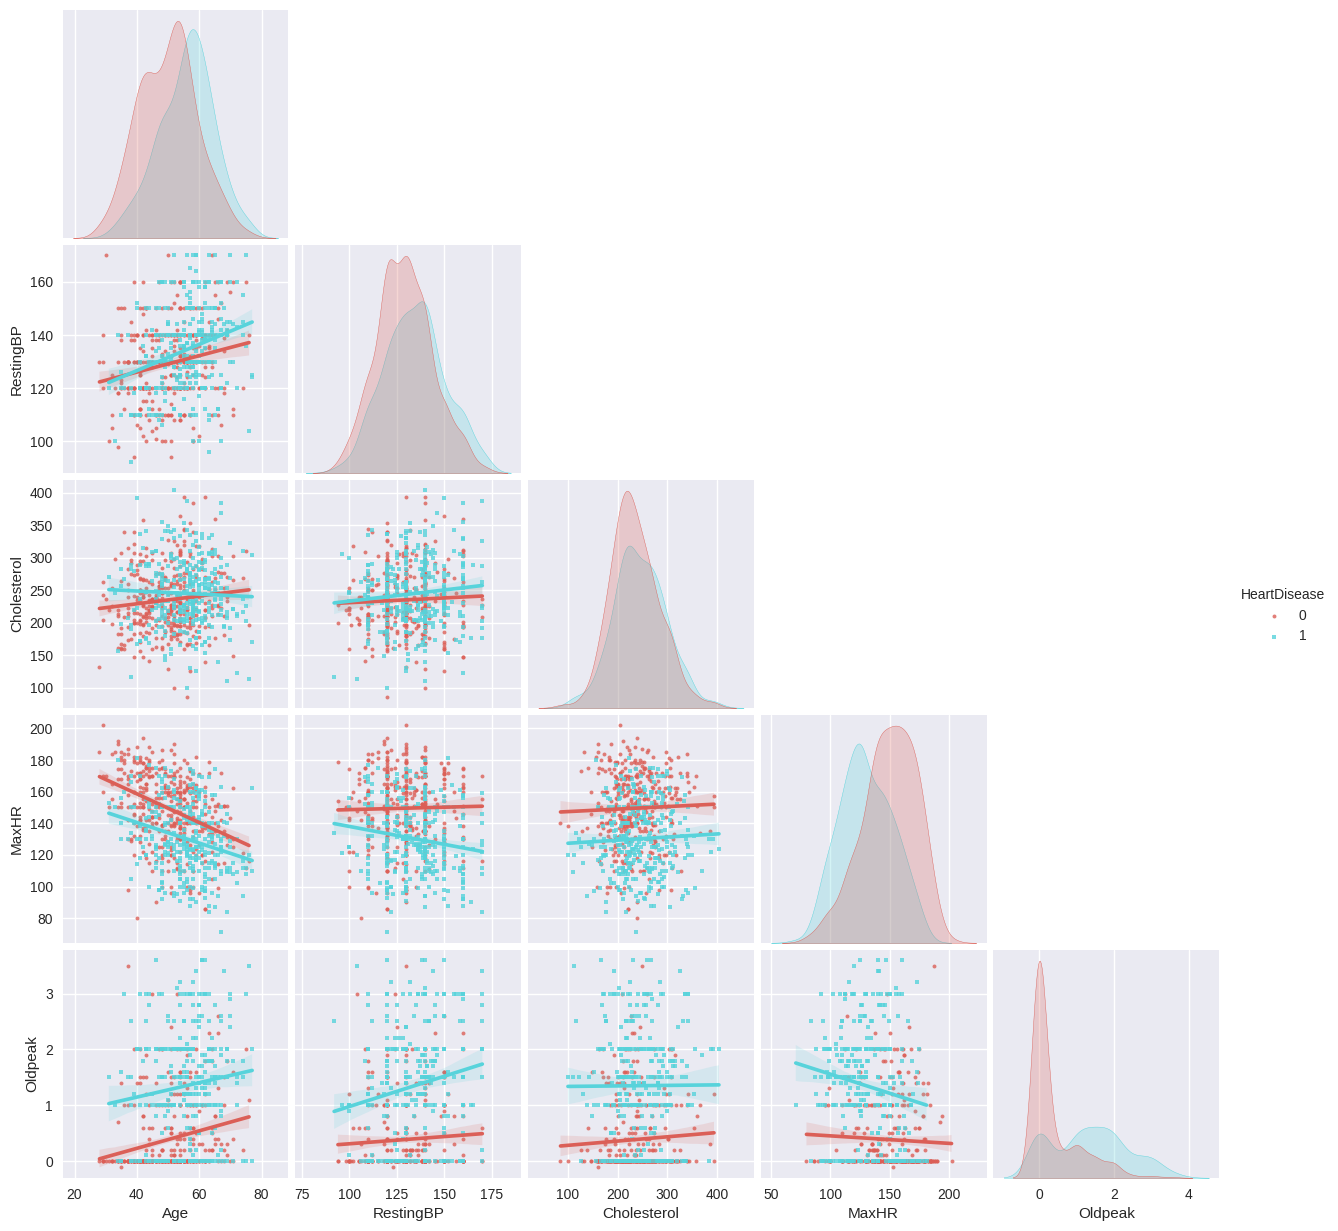

In [37]:
plt.figure(figsize=(20,40))
sns.pairplot(data=temp[numerical_variables + ["HeartDisease"]], hue="HeartDisease", palette='hls', kind="reg", corner=True, markers=["o", "s"], plot_kws={ 'scatter_kws': {'alpha': 0.8, 's':8}})

In [38]:
one_hot_encoder= OneHotEncoder(sparse = False)  # It us not used yet, we will make changes later  
one_hot_encoder.fit_transform(temp[['ChestPainType']])

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [39]:
encoded_data = pd.get_dummies(temp, columns = ['Sex','ExerciseAngina','FastingBS','ST_Slope','ChestPainType','RestingECG'],drop_first=True)

<Axes: >

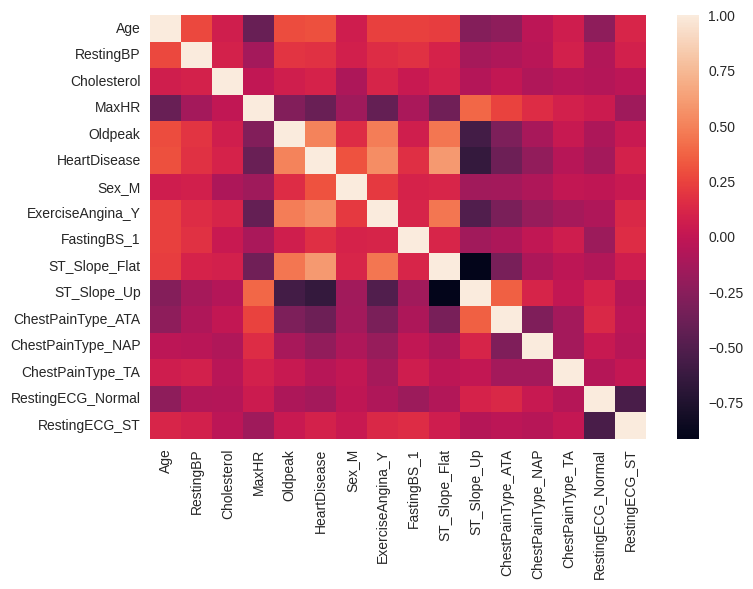

In [40]:
sns.heatmap(encoded_data.corr())

In [41]:
X = encoded_data.drop('HeartDisease', axis = 1)
y = encoded_data[['HeartDisease']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [43]:
def featureSelect_dataframe(X, y, criteria, k):
  reg = SelectKBest(criteria, k=k).fit(X,y)
  X_transformed = reg.transform(X)
  X = X[[val for i,val in enumerate(X.columns) if reg.get_support()[i]]]
  return X

New_X = featureSelect_dataframe(X_train, y_train, f_classif, 4)

New_X

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Oldpeak,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
175,2.0,1,1,0
747,0.0,0,0,1
431,0.0,0,0,1
555,0.0,1,1,0
117,1.5,1,1,0
...,...,...,...,...
75,0.0,0,0,1
113,0.0,0,0,1
287,0.0,0,0,1
634,1.4,1,0,1


In [44]:
scaler = StandardScaler()
pca = PCA(0.95)

In [45]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test) 

In [46]:
PCA_X_train = pca.fit_transform(scaled_X_train)
PCA_X_test = pca.transform(scaled_X_test)

In [47]:
PCA_X_train.shape

(561, 13)

In [48]:
from sklearn.tree import DecisionTreeClassifier 
import time
from datetime import datetime as dt

In [49]:
dtree=DecisionTreeClassifier(criterion="gini")

In [50]:
t0 = dt.now()
print("Training time before:", (dt.now()-t0).seconds)

Training time before: 0


In [51]:
dtree.fit(X_train,y_train)
#dtree.fit(scaled_X_train,y_train)
#dtree.fit(PCA_X_train,y_train)

DecisionTreeClassifier()

In [52]:
print("Training time before:", (dt.now()-t0).seconds)

Training time before: 0


In [53]:
pred=dtree.predict(X_test)
#pred=dtree.predict(scaled_X_test)
#pred=dtree.predict(PCA_X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score

Confusion Matrix:
[[57 14]
 [16 54]]


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        71
           1       0.79      0.77      0.78        70

    accuracy                           0.79       141
   macro avg       0.79      0.79      0.79       141
weighted avg       0.79      0.79      0.79       141



Accuracy: 0.7872340425531915


Precision: 0.7874697824335213
Recall: 0.7871227364185112
0.787122736418511


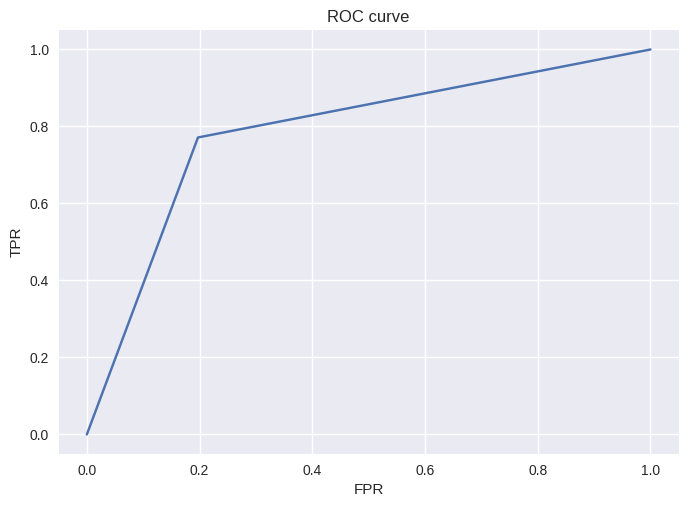

In [55]:
result = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(result)
print('\n')
result1 = classification_report(y_test, pred)
print("Classification Report:",)
print (result1)
print('\n')
result2 = accuracy_score(y_test,pred)
print("Accuracy:",result2)
print('\n')
# calculate precision and recall scores
precision = precision_score(y_test, pred, average='macro')
recall = recall_score(y_test, pred, average='macro')

# print the results
print("Precision:", precision)
print("Recall:", recall)

print(roc_auc_score(y_test, pred))

fpr, tpr, _ = roc_curve(y_test, pred)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [56]:
dtree_1 = DecisionTreeClassifier(criterion="entropy")

In [57]:
t1 = dt.now()
print("Training time before:", (dt.now()-t1).seconds)

Training time before: 0


In [58]:
dtree_1 = dtree_1.fit(X_train,y_train)
#dtree_1 = dtree_1.fit(scaled_X_train,y_train)
#dtree_1 = dtree_1.fit(PCA_X_train,y_train)

In [59]:
print("Training time before:", (dt.now()-t1).seconds)

Training time before: 0


In [60]:
y_pred = dtree_1.predict(X_test)
#y_pred = dtree_1.predict(scaled_X_test)
#y_pred = dtree_1.predict(PCA_X_test)

In [61]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print('\n')
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
print('\n')
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)
print('\n')
# calculate precision and recall scores
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

# print the results
print("Precision:", precision)
print("Recall:", recall)

Confusion Matrix:
[[58 13]
 [21 49]]


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77        71
           1       0.79      0.70      0.74        70

    accuracy                           0.76       141
   macro avg       0.76      0.76      0.76       141
weighted avg       0.76      0.76      0.76       141



Accuracy: 0.7588652482269503


Precision: 0.7622498979175174
Recall: 0.7584507042253521


In [62]:
from sklearn.neighbors import KNeighborsClassifier 

In [63]:
knn= KNeighborsClassifier(n_neighbors=1) 

In [64]:
knn.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [65]:
pred=knn.predict(X_test)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [67]:
result = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,pred)
print("Accuracy:",result2)

Confusion Matrix:
[[40 31]
 [24 46]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.56      0.59        71
           1       0.60      0.66      0.63        70

    accuracy                           0.61       141
   macro avg       0.61      0.61      0.61       141
weighted avg       0.61      0.61      0.61       141

Accuracy: 0.6099290780141844


In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Text(0, 0.5, 'Accuracy Score')

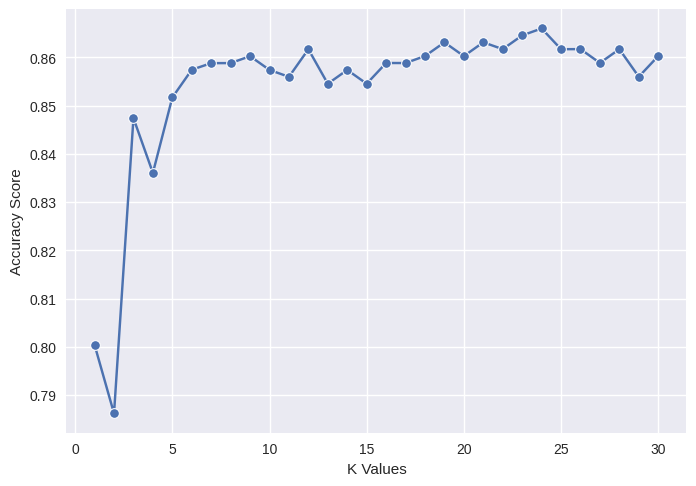

In [70]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [71]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=24)

In [72]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
result = confusion_matrix(y_test, y_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:", result)

Accuracy: 0.6595744680851063
Precision: 0.7291666666666666
Recall: 0.5
Confusion Matrix: [[58 13]
 [35 35]]


In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [75]:
rfc=RandomForestClassifier(n_estimators = 500, max_depth = 4, max_features = 3, bootstrap = True, random_state = 18)

In [76]:
rfc.fit(X_test,y_test)

<ipython-input-76-648072b93ef7>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_test,y_test)


RandomForestClassifier(max_depth=4, max_features=3, n_estimators=500,
                       random_state=18)

In [77]:
rfc_pred=rfc.predict(X_test)

In [78]:
print(classification_report(y_test,rfc_pred))
accuracy = accuracy_score(y_test, rfc_pred)
precision = precision_score(y_test, rfc_pred)
recall = recall_score(y_test, rfc_pred)
result = confusion_matrix(y_test, rfc_pred)
f1score = f1_score(y_test, rfc_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:", result)
print("f1 score:", f1score)

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        71
           1       0.91      0.99      0.95        70

    accuracy                           0.94       141
   macro avg       0.95      0.94      0.94       141
weighted avg       0.95      0.94      0.94       141

Accuracy: 0.9432624113475178
Precision: 0.9078947368421053
Recall: 0.9857142857142858
Confusion Matrix: [[64  7]
 [ 1 69]]
f1 score: 0.9452054794520548


In [79]:
from sklearn.svm import SVC 

In [80]:
model=SVC()

In [81]:
#model.fit(X_train,y_train)
model.fit(scaled_X_train,y_train)
#model.fit(PCA_X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [82]:
#pred=model.predict(X_test)
pred=model.predict(scaled_X_test)
#pred=model.predict(PCA_X_test)

In [83]:
print(classification_report(y_test,pred))
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
result = confusion_matrix(y_test, pred)
f1score = f1_score(y_test, pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:", result)
print("f1 score:", f1score)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        71
           1       0.90      0.86      0.88        70

    accuracy                           0.88       141
   macro avg       0.88      0.88      0.88       141
weighted avg       0.88      0.88      0.88       141

Accuracy: 0.8794326241134752
Precision: 0.8955223880597015
Recall: 0.8571428571428571
Confusion Matrix: [[64  7]
 [10 60]]
f1 score: 0.8759124087591241


In [84]:
heart_final=heart.copy()

In [85]:
heart_final.to_csv('drive/My Drive/Datasets/heart_disease_final.csv', index=False)

In [86]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=d3777b5adf132dff49fb11683c55bf04034f744be07441afa89e721eebc2db79
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [87]:
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [88]:
spark = SparkSession.builder\
 .master("local[*]")\
 .appName("Heart Disease Analysis")\
 .getOrCreate()
sc = spark.sparkContext

In [89]:
heart = spark.read.csv('drive/My Drive/Datasets/heart_disease_final.csv', header = True, inferSchema = True)

In [90]:
heart.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Sex: string (nullable = true)
 |-- ChestPainType: string (nullable = true)
 |-- RestingBP: integer (nullable = true)
 |-- Cholesterol: integer (nullable = true)
 |-- FastingBS: integer (nullable = true)
 |-- RestingECG: string (nullable = true)
 |-- MaxHR: integer (nullable = true)
 |-- ExerciseAngina: string (nullable = true)
 |-- Oldpeak: double (nullable = true)
 |-- ST_Slope: string (nullable = true)
 |-- HeartDisease: integer (nullable = true)



In [91]:
from pyspark.ml.feature import StringIndexer

In [92]:
indexer=StringIndexer(inputCols=["Sex","RestingECG","ExerciseAngina","ST_Slope", "ChestPainType"],outputCols=["Sex_indexed","RestingECG_indexed","ExerciseAngina_indexed","ST_Slope_indexed","ChestPainType_indexed"])
heart_indexed=indexer.fit(heart).transform(heart)
heart_indexed.show()

+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+-----------+------------------+----------------------+----------------+---------------------+
|Age|Sex|ChestPainType|RestingBP|Cholesterol|FastingBS|RestingECG|MaxHR|ExerciseAngina|Oldpeak|ST_Slope|HeartDisease|Sex_indexed|RestingECG_indexed|ExerciseAngina_indexed|ST_Slope_indexed|ChestPainType_indexed|
+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+-----------+------------------+----------------------+----------------+---------------------+
| 40|  M|          ATA|      140|        289|        0|    Normal|  172|             N|    0.0|      Up|           0|        0.0|               0.0|                   0.0|             1.0|                  2.0|
| 49|  F|          NAP|      160|        180|        0|    Normal|  156|             N|    1.0|    Flat|           1|        1.0|               0.0|        

In [93]:
heart_indexed.columns

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease',
 'Sex_indexed',
 'RestingECG_indexed',
 'ExerciseAngina_indexed',
 'ST_Slope_indexed',
 'ChestPainType_indexed']

In [94]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=['Age','Sex_indexed','ChestPainType_indexed','RestingBP','Cholesterol','FastingBS','RestingECG_indexed','MaxHR','ExerciseAngina_indexed','Oldpeak','ChestPainType_indexed'], outputCol="Independent_features")
output=assembler.transform(heart_indexed)

In [95]:
output.show()

+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+-----------+------------------+----------------------+----------------+---------------------+--------------------+
|Age|Sex|ChestPainType|RestingBP|Cholesterol|FastingBS|RestingECG|MaxHR|ExerciseAngina|Oldpeak|ST_Slope|HeartDisease|Sex_indexed|RestingECG_indexed|ExerciseAngina_indexed|ST_Slope_indexed|ChestPainType_indexed|Independent_features|
+---+---+-------------+---------+-----------+---------+----------+-----+--------------+-------+--------+------------+-----------+------------------+----------------------+----------------+---------------------+--------------------+
| 40|  M|          ATA|      140|        289|        0|    Normal|  172|             N|    0.0|      Up|           0|        0.0|               0.0|                   0.0|             1.0|                  2.0|(11,[0,2,3,4,7,10...|
| 49|  F|          NAP|      160|        180|        0|    Normal|  156|

In [96]:
output.select('Independent_features').show()

+--------------------+
|Independent_features|
+--------------------+
|(11,[0,2,3,4,7,10...|
|[49.0,1.0,1.0,160...|
|[37.0,0.0,2.0,130...|
|[48.0,1.0,0.0,138...|
|(11,[0,2,3,4,7,10...|
|(11,[0,2,3,4,7,10...|
|[45.0,1.0,2.0,130...|
|(11,[0,2,3,4,7,10...|
|(11,[0,3,4,7,8,9]...|
|[48.0,1.0,2.0,120...|
|[37.0,1.0,1.0,130...|
|[58.0,0.0,2.0,136...|
|(11,[0,2,3,4,7,10...|
|(11,[0,3,4,7,8,9]...|
|[42.0,1.0,1.0,115...|
|[54.0,1.0,2.0,120...|
|(11,[0,3,4,7],[38...|
|[43.0,1.0,2.0,120...|
|(11,[0,3,4,7,9],[...|
|[36.0,0.0,2.0,120...|
+--------------------+
only showing top 20 rows



In [97]:
finalized_data=output.select('Independent_features',"HeartDisease")

In [98]:
finalized_data.show()

+--------------------+------------+
|Independent_features|HeartDisease|
+--------------------+------------+
|(11,[0,2,3,4,7,10...|           0|
|[49.0,1.0,1.0,160...|           1|
|[37.0,0.0,2.0,130...|           0|
|[48.0,1.0,0.0,138...|           1|
|(11,[0,2,3,4,7,10...|           0|
|(11,[0,2,3,4,7,10...|           0|
|[45.0,1.0,2.0,130...|           0|
|(11,[0,2,3,4,7,10...|           0|
|(11,[0,3,4,7,8,9]...|           1|
|[48.0,1.0,2.0,120...|           0|
|[37.0,1.0,1.0,130...|           0|
|[58.0,0.0,2.0,136...|           1|
|(11,[0,2,3,4,7,10...|           0|
|(11,[0,3,4,7,8,9]...|           1|
|[42.0,1.0,1.0,115...|           0|
|[54.0,1.0,2.0,120...|           0|
|(11,[0,3,4,7],[38...|           1|
|[43.0,1.0,2.0,120...|           0|
|(11,[0,3,4,7,9],[...|           1|
|[36.0,0.0,2.0,120...|           1|
+--------------------+------------+
only showing top 20 rows



In [99]:
train_data, test_data = finalized_data.randomSplit([0.8, 0.2])

In [100]:
print(train_data.count())

735


In [101]:
print(test_data.count())

183


In [120]:
from pyspark.ml.classification import RandomForestClassifier
from time import *

start_time = time()


In [125]:
lr = RandomForestClassifier(featuresCol = 'Independent_features', labelCol = 'HeartDisease')
lrModel = lr.fit(train_data)

In [126]:
lrModel_predictions=lrModel.transform(test_data)

In [127]:
lrModel_predictions.show()

+--------------------+------------+--------------------+--------------------+----------+
|Independent_features|HeartDisease|       rawPrediction|         probability|prediction|
+--------------------+------------+--------------------+--------------------+----------+
|(11,[0,1,3,4,6,7]...|           0|[12.3791394122513...|[0.61895697061256...|       0.0|
|(11,[0,1,3,4,6,7]...|           1|[9.10841131389168...|[0.45542056569458...|       1.0|
|(11,[0,1,3,4,7],[...|           0|[11.5628028329073...|[0.57814014164536...|       0.0|
|(11,[0,1,3,4,7,8]...|           1|[7.23366476481089...|[0.36168323824054...|       1.0|
|(11,[0,1,3,4,7,8]...|           1|[5.69268317918605...|[0.28463415895930...|       1.0|
|(11,[0,1,3,4,7,9]...|           1|[6.75518000330691...|[0.33775900016534...|       1.0|
|(11,[0,1,3,7],[38...|           1|[9.20452336739753...|[0.46022616836987...|       1.0|
|(11,[0,2,3,4,7,10...|           0|[18.1795062733707...|[0.90897531366853...|       0.0|
|(11,[0,2,3,4,7,10...

In [128]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [137]:
rfevaluator = BinaryClassificationEvaluator().setLabelCol("HeartDisease")

In [154]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
 .addGrid(lr.maxDepth, [2, 4, 6])
 .addGrid(lr.maxBins, [20, 60])
 .addGrid(lr.numTrees, [5,6,7,8])
 .build())
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=rfevaluator, numFolds=5)
cvModel = cv.fit(train_data)
predictions = cvModel.transform(test_data)
rfevaluator.evaluate(predictions)

0.8669135802469139

In [107]:
lrModel_auc=BinaryClassificationEvaluator(labelCol = 'HeartDisease').evaluate(lrModel_predictions)

In [108]:
lrModel_auc

0.8755555555555554

In [109]:
lrModel.featureImportances

SparseVector(11, {0: 0.0533, 1: 0.0438, 2: 0.1614, 3: 0.0291, 4: 0.085, 5: 0.0376, 6: 0.0141, 7: 0.0979, 8: 0.0894, 9: 0.1131, 10: 0.2752})

In [110]:
from sklearn.model_selection import GridSearchCV